# <h3 align="center">__Module 7 Activity__</h3>
# <h3 align="center">__Assigned at the start of Module 7__</h3>
# <h3 align="center">__Due at the end of Module 7__</h3><br>

# Weekly Discussion Forum Participation

Each week, you are required to participate in the module’s discussion forum. The discussion forum consists of the week's Module Activity, which is released at the beginning of the module. You must complete/attempt the activity before you can post about the activity and anything that relates to the topic.

## Grading of the Discussion

### 1. Initial Post:
Create your thread by **Day 5 (Saturday night at midnight, PST).**

### 2. Responses:
Respond to at least two other posts by **Day 7 (Monday night at midnight, PST).**

---

## Grading Criteria:

Your participation will be graded as follows:

### Full Credit (100 points):
- Submit your initial post by **Day 5.**
- Respond to at least two other posts by **Day 7.**

### Half Credit (50 points):
- If your initial post is late but you respond to two other posts.
- If your initial post is on time but you fail to respond to at least two other posts.

### No Credit (0 points):
- If both your initial post and responses are late.
- If you fail to submit an initial post and do not respond to any others.

---

## Additional Notes:

- **Late Initial Posts:** Late posts will automatically receive half credit if two responses are completed on time.
- **Substance Matters:** Responses must be thoughtful and constructive. Comments like “Great post!” or “I agree!” without further explanation will not earn credit.
- **Balance Participation:** Aim to engage with threads that have fewer or no responses to ensure a balanced discussion.

---

## Avoid:
- A number of posts within a very short time-frame, especially immediately prior to the posting deadline.
- Posts that complement another post, and then consist of a summary of that.


# Problem 1: Traversal Algorithms  (BFS vs. DFS)

A delivery robot must navigate a warehouse modeled as a graph where nodes represent storage areas and edges represent walkable paths. You must determine the best way for the robot to explore the entire warehouse efficiently.

    A -- B -- C
    |    |    |
    D -- E -- F
    |    |    |
    G -- H -- I

```python
from collections import deque

# Define the warehouse as a graph (Adjacency List)
warehouse_graph = {
    'A': ['B', 'D'],
    'B': ['A', 'C', 'E'],
    'C': ['B', 'F'],
    'D': ['A', 'E', 'G'],
    'E': ['B', 'D', 'F', 'H'],
    'F': ['C', 'E', 'I'],
    'G': ['D', 'H'],
    'H': ['E', 'G', 'I'],
    'I': ['F', 'H']
}

def bfs(graph, start):
    # Implement BFS here

def dfs(graph, start, visited=None):
    # Implement DFS here

# Run BFS and DFS on 'A' and compare results
```

## Questions:
1. Implement the missing BFS and DFS functions in the code above.
2. What is the order of node visits using BFS vs. DFS when starting from node 'A'?
3. If the warehouse has multiple exits, which traversal method (BFS or DFS) would be better for finding the shortest exit path? Why?

### Implementation of BFS and DFS


In [1]:
from collections import deque

# Define the warehouse as a graph (Adjacency List)
warehouse_graph = {
    'A': ['B', 'D'],
    'B': ['A', 'C', 'E'],
    'C': ['B', 'F'],
    'D': ['A', 'E', 'G'],
    'E': ['B', 'D', 'F', 'H'],
    'F': ['C', 'E', 'I'],
    'G': ['D', 'H'],
    'H': ['E', 'G', 'I'],
    'I': ['F', 'H']
}

def bfs(graph, start):
    # Implement BFS here
    queue = deque([start])
    visited = set([start])
    path = [start]
    while queue:
        node = queue.popleft()
        # Process neighbors
        for neighbor in graph[node]:
            if neighbor not in visited:
                path.append(neighbor)
                visited.add(neighbor)
                queue.append(neighbor)
    return path


def dfs_recursive(graph, node, dfs_path, visited):
  # Implement DFS here
  visited.add(node)
  dfs_path.append(node)
  for neighbor in graph[node]:
    if neighbor not in visited:
        dfs_recursive(graph, neighbor, dfs_path, visited)
def dfs(graph, start, visited=None):
  # Implement DFS here
  dfs_path = []
  visited = set()
  dfs_recursive(graph, start, dfs_path, visited)
  return dfs_path

# Run BFS and DFS on 'A' and compare results
print("BFS:", bfs(warehouse_graph, 'A'))
print("DFS:", dfs(warehouse_graph, 'A', set()))

BFS: ['A', 'B', 'D', 'C', 'E', 'G', 'F', 'H', 'I']
DFS: ['A', 'B', 'C', 'F', 'E', 'D', 'G', 'H', 'I']


### Order of visited nodes
**BFS**
```
['A', 'B', 'D', 'C', 'E', 'G', 'F', 'H', 'I']
```
**DFS**
```
['A', 'B', 'C', 'F', 'E', 'D', 'G', 'H', 'I']
```

### Shortest path for exit
- Since BFS goes level by level therefore discovery of node gives the shortest path.
- Therefore we will use BFS to find out the shortest exist path

# Problem 2: Decision Trees - Making Predictions from Data

A company wants to predict whether a customer will buy a product based on two features: Age Group (Young, Middle, Senior) and Income Level (Low, Medium, High). They plan to use a Decision Tree to classify potential customers.

You are given the following customer data

| Person | Age Group | Income  | Buys Product? |
|--------|----------|---------|--------------|
| 1      | Young    | Low     | No           |
| 2      | Young    | Medium  | No           |
| 3      | Young    | High    | Yes          |
| 4      | Middle   | Low     | Yes          |
| 5      | Middle   | Medium  | Yes          |
| 6      | Middle   | High    | No           |
| 7      | Senior   | Low     | Yes          |
| 8      | Senior   | Medium  | Yes          |
| 9      | Senior   | High    | No           |

You may use `sklearn` to design your decision tree classifier. Your criterion for split should be what we discussed in the lecture.


Model predicted: ['No']


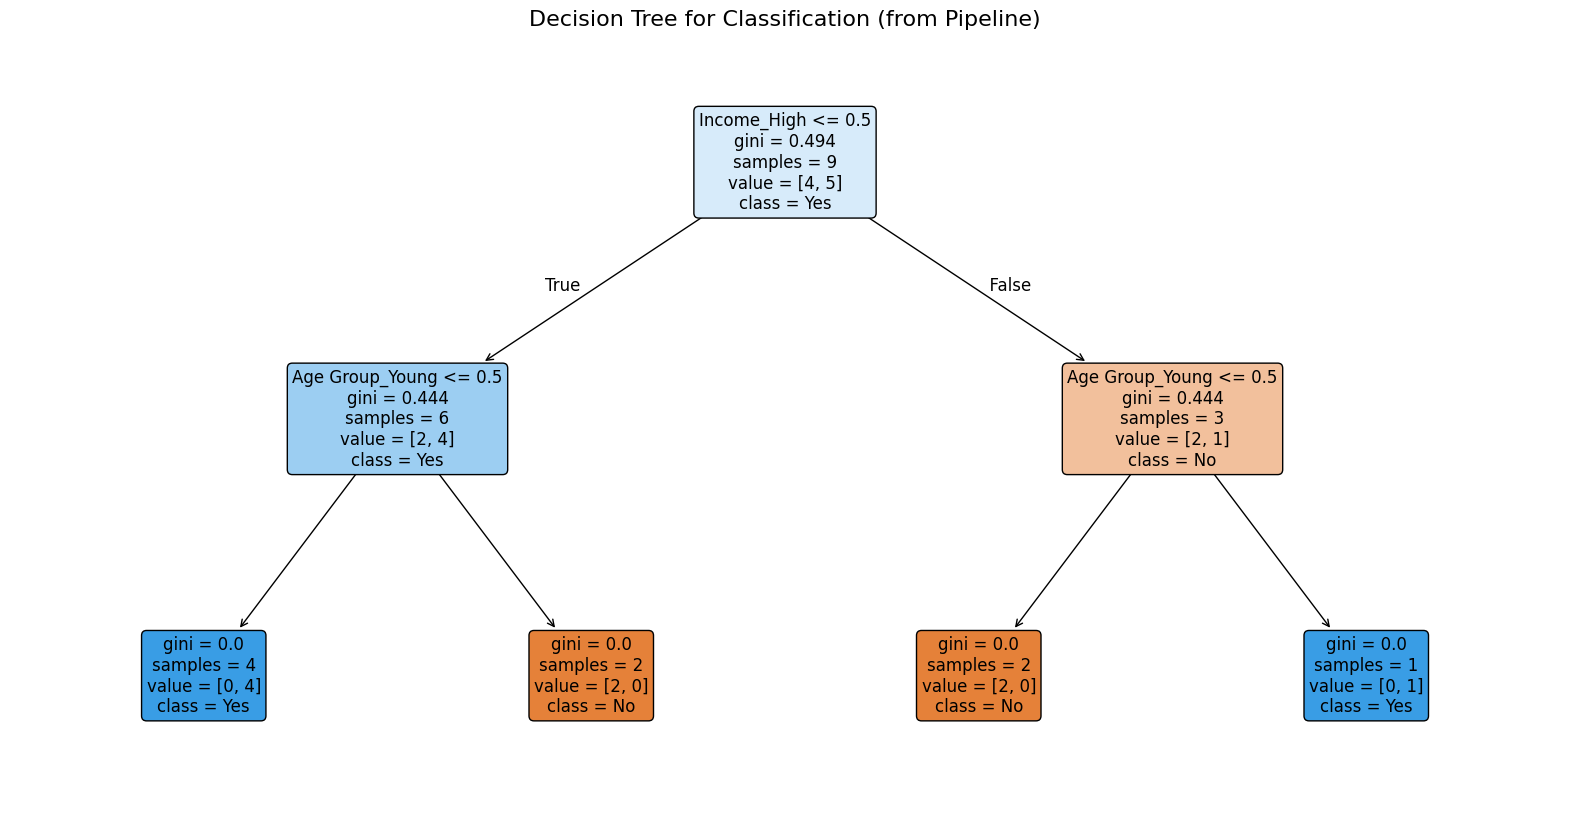

In [2]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

data = {
    'Person': [1,2,3,4,5,6,7,8,9],
    'Age Group': ['Young','Young','Young','Middle','Middle','Middle','Senior','Senior','Senior'],
    'Income': ['Low', 'Medium', 'High','Low', 'Medium', 'High','Low', 'Medium', 'High'],
    'Buys Product?': ['No','No','Yes','Yes','Yes','No','Yes','Yes','No']
}
df = pd.DataFrame(data)

pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore')),  # Step 1: Standardize the features
    ('classifier', DecisionTreeClassifier(max_depth=3, random_state=42)) # Step 2: The model
])

X_train = df[['Age Group', 'Income']]
y_train = df['Buys Product?']
pipeline.fit(X_train, y_train)

X_test = pd.DataFrame({'Age Group': ['Middle'], 'Income': ['High']})
y_pred = pipeline.predict(X_test)
print(f"\nModel predicted: {y_pred}")

# Visualize the Decision Tree from the Pipeline
# To visualize the tree, we need to access it from inside the pipeline.
decision_tree_model = pipeline.named_steps['classifier']

feature_names_original = ['Age Group', 'Income']
target_names_original = ['Buys Product?']
onehot_encoder = pipeline.named_steps['onehot']
feature_names_new = onehot_encoder.get_feature_names_out(feature_names_original)


plt.figure(figsize=(20, 10))

plot_tree(
    decision_tree_model,
    filled=True,
    feature_names=list(feature_names_new),
    class_names=sorted(y_train.unique()),
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree for Classification (from Pipeline)", fontsize=16)
plt.show()


## Q1. Analyze the trained Decision Tree. What feature is chosen as the first split and why?
- Income with `High` is chosen as first split
- It was chosen high bcz `Gini` value was the highest for this as `0.494`

## Q2. Suppose a new customer is "Middle-aged" with a "High" income. What is the model's predicted outcome?
- It predicted `No`

## Q3. How would increasing the depth of the Decision Tree impact it's predictions?
- Increasing the depth of a Decision Tree has a profound, double-edged impact on its predictions.
- It's the primary way we control the bias-variance trade-off for this type of model.

# Problem 3: Bayesian Networks - Probabilistic Reasoning

You are working with a medical diagnosis system that predicts the likelihood of a patient having the Flu based on symptoms like Fever and Cough.
```
       Flu
      /    \
   Fever   Cough
```

## Conditional Probability Tables

### Table 1: Prior Probability of Flu
| **Flu (F)**  | **P(F)** |
|-------------|--------|
| True (1)    | 0.10   |
| False (0)   | 0.90   |

---

### Table 2: Conditional Probability of Fever Given Flu
| **Fever (V)** | **P(V \| F=1)** | **P(V \| F=0)** |
|--------------|-------------|-------------|
| True (1)     | 0.85        | 0.30        |
| False (0)    | 0.15        | 0.70        |

---

### Table 3: Conditional Probability of Cough Given Flu
| **Cough (C)** | **P(C \| F=1)** | **P(C \| F=0)** |
|--------------|-------------|-------------|
| True (1)     | 0.70        | 0.20        |
| False (0)    | 0.30        | 0.80        |


Here is some skeleton code to get you started. You will need to fill in portions that are missing. Notice that we are going to use the Variable Elimination method in this exercise. You will need to know how to implement Gibbs for your Programming Assignment.  

```python
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD

# Define Bayesian Network Structure
model = BayesianModel([('Flu', 'Fever'), ('Flu', 'Cough')])

# Define CPDs
cpd_flu = TabularCPD(variable='Flu', variable_card=2, values=[[0.9], [0.1]])
cpd_fever =
cpd_cough =

# Add CPDs to model
model.add_cpds(cpd_flu, cpd_fever, cpd_cough)

# Perform Bayesian Inference
inference = VariableElimination(model)
result = inference.query(variables=['Flu'], evidence={'Fever': 1, 'Cough': 1})
print(result)

```

## Q1. Finish the code.


In [3]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [4]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD

# Define Bayesian Network Structure
model = DiscreteBayesianNetwork([('Flu', 'Fever'), ('Flu', 'Cough')])

# Define the Conditional Probability Density Tables (CPDs)
# Note: In pgmpy, it's conventional to have the first row/state be 'True'
# and the second be 'False'. We will use this convention.

# Define CPDs
# P(Flu=True) = 0.10, P(Flu=False) = 0.90
cpd_flu = TabularCPD(variable='Flu', variable_card=2,
                     values=[[0.1], # P(V=T)
                            [0.9]]  # P(V=F)
                     )

# CPD for Fever (parent: Flu)
# The columns correspond to the state of the parent 'Flu'.
# Column 1: P(Fever | Flu=True), Column 2: P(Fever | Flu=False)
cpd_fever = TabularCPD(variable='Fever', variable_card=2,
                       values=[[0.85, 0.30],  # P(Fever=True | Flu)
                               [0.15, 0.70]], # P(Fever=False | Flu)
                       evidence=['Flu'],
                       evidence_card=[2])

# CPD for Cough (parent: Flu)
# Column 1: P(Cough | Flu=True), Column 2: P(Cough | Flu=False)
cpd_cough = TabularCPD(variable='Cough', variable_card=2,
                       values=[[0.70, 0.20],  # P(Cough=True | Flu)
                               [0.30, 0.80]], # P(Cough=False | Flu)
                       evidence=['Flu'],
                       evidence_card=[2])

# Add CPDs to model
model.add_cpds(cpd_flu, cpd_fever, cpd_cough)

# Perform Bayesian Inference
inference = VariableElimination(model)
result = inference.query(variables=['Flu'], evidence={'Fever': 1, 'Cough': 0})
print(result)

+--------+------------+
| Flu    |   phi(Flu) |
+========+============+
| Flu(0) |     0.0769 |
+--------+------------+
| Flu(1) |     0.9231 |
+--------+------------+


## Q2. Compute $P(F|V=1, C=1)$. What is the probability that a patient has the Flu given that they have both Fever and Cough?
Following is probability that a patient has the Flu given that they have both Fever and Cough
```
+--------+------------+
| Flu    |   phi(Flu) |
+========+============+
| Flu(0) |     0.0088 |
+--------+------------+
| Flu(1) |     0.9912 |
+--------+------------+
```
## Q3. How would the result change if the patient had only Fever but no Cough?
Following is probability if the patient had only Fever but no Cough
```
+--------+------------+
| Flu    |   phi(Flu) |
+========+============+
| Flu(0) |     0.0769 |
+--------+------------+
| Flu(1) |     0.9231 |
+--------+------------+
```
## Q4. How does increasing the number of symptoms in the network affect inference complexity?
- The impact of adding more symptoms depends entirely on how they are connected to the rest of the network.
- It is not the number of nodes that dictates complexity, but the pattern of their connections.
- Adding symptoms in a tree-like structure is computationally cheap.

# Problem 4: Clustering using Louvain & Spectral Clustering

You are analyzing a social network where people are connected based on their interactions. Your goal is to detect communities in the network.

Here is the code for Louvain Clustering

```python
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt

# Create a social network graph
G = nx.karate_club_graph()

# Apply Louvain Algorithm
partition = community_louvain.best_partition(G)

# Visualize the clusters
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
cmap = plt.get_cmap("viridis")

for node, community in partition.items():
    nx.draw_networkx_nodes(G, pos, [node], node_color=[community], cmap=cmap)

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()
```

## Questions

1. What communities were detected in the social network using Louvain clustering?
2. Perform Spectral Clustering on the same dataset using `sklearn.cluster import SpectralClustering` (Hint: Try different values for `n_clusters` to see how the clustering changes)
3. Compare the __Spectral Clustering__ to __Louvain__. Do they align?
4. Why is graph-based clustering superior to traditional K-Means clustering for network data?

## Updated code for Louvain Clustering

In [5]:
# !pip uninstall python-louvain
!pip install python-louvain
!pip install networkx
!pip install matplotlib

Louvain Community Partition:
{0: 2, 1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 1, 8: 3, 9: 3, 10: 2, 11: 2, 12: 1, 13: 1, 14: 3, 15: 3, 16: 2, 17: 2, 18: 3, 19: 2, 20: 3, 21: 2, 22: 3, 23: 0, 24: 0, 25: 0, 26: 3, 27: 0, 28: 0, 29: 3, 30: 3, 31: 0, 32: 3, 33: 3}


/tmp/ipython-input-6-2675487643.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


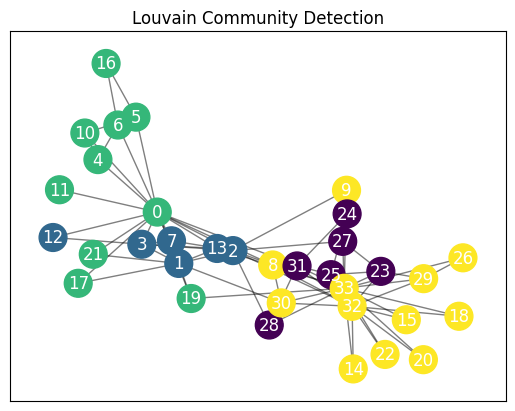

In [6]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create a social network graph
G = nx.karate_club_graph()

# Apply Louvain Algorithm
partition = community_louvain.best_partition(G)

# Print the resulting communities
print("Louvain Community Partition:")
print(partition)

# Visualize the clusters

# Use a layout for the graph
pos = nx.spring_layout(G)

# Create a color map from the partition dictionary
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

# Draw the nodes with colors based on their community
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=400,
                       cmap=cmap, node_color=list(partition.values()))

# Draw the edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Add labels
nx.draw_networkx_labels(G, pos, font_color="white")

plt.title("Louvain Community Detection")
plt.show()

In [7]:
# Get reverse mapping
from collections import defaultdict
reverse_partition = defaultdict(list)
for key, value in partition.items():
  reverse_partition[value].append(key)
print(reverse_partition)

defaultdict(<class 'list'>, {2: [0, 4, 5, 6, 10, 11, 16, 17, 19, 21], 1: [1, 2, 3, 7, 12, 13], 3: [8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33], 0: [23, 24, 25, 27, 28, 31]})


## Q1. What communities were detected in the social network using Louvain clustering?
Following communities are detected
```
{
  0: [24, 25, 28, 31]
  1: [1, 2, 3, 7, 12, 13],
  2: [0, 4, 5, 6, 10, 11, 16, 17, 19, 21],
  3: [8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33],
  }
```

## Q2. Perform Spectral Clustering on the same dataset using `sklearn.cluster import SpectralClustering` (Hint: Try different values for `n_clusters` to see how the clustering changes)

Ans:

**Challanges**
- Scikit-learn's SpectralClustering doesn't work directly with a networkx graph object.
- It needs a numerical matrix that represents the graph's structure.
- The most common way to provide this is with the Adjacency Matrix.
- Unlike Louvain, Spectral Clustering requires us to specify the number of clusters.
- The Karate Club is famously known to split into two factions (Mr. Hi and John A.), so k=2 is a great choice.

Following are steps
- Keep the networkx graph creation.
- Convert the networkx graph into its Adjacency Matrix.
- Feed this matrix to SpectralClustering, telling it the matrix is "precomputed."
- Update the visualization code to use the new labels.


In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import SpectralClustering
from collections import defaultdict

# Create a social network graph
G = nx.karate_club_graph()

# SPECTRAL CLUSTERING IMPLEMENTATION

# Convert the NetworkX graph to a NumPy array (Adjacency Matrix)
# The adjacency matrix represents connections: A[i, j] = 1 if an edge exists, else 0.
adjacency_matrix = nx.to_numpy_array(G)


def runSpectralClustering(n_clusters):
  # Unlike Louvain, Spectral Clustering requires us to specify the number of clusters.
  spectral = SpectralClustering(
      n_clusters=n_clusters,
      affinity='precomputed', # This tells the model to use our adjacency matrix directly
      random_state=42
  )

  # The output is a NumPy array where each index corresponds to a node.
  spectral_labels = spectral.fit_predict(adjacency_matrix)


  # Visualization of the Spectral Clustering Results

  print("Spectral Clustering Partition (Node: Cluster ID):")
  partition_spectral = {node: label for node, label in enumerate(spectral_labels)}
  print(partition_spectral)
  reverse_partition = defaultdict(list)
  for node, label in enumerate(spectral_labels):
    reverse_partition[int(label)].append(node)
  print(reverse_partition)


  # Use a layout for the graph (same as before)
  pos = nx.spring_layout(G, seed=42) # Use a seed for a reproducible layout

  # Create a color map from the labels
  cmap = cm.get_cmap('viridis', max(spectral_labels) + 1)

  # Draw the nodes with colors based on their community
  # The node_color argument can directly take the NumPy array of labels.
  nx.draw_networkx_nodes(G, pos, G.nodes(), node_size=400,
                        cmap=cmap, node_color=spectral_labels)

  # Draw the edges
  nx.draw_networkx_edges(G, pos, alpha=0.5)

  # Add labels
  nx.draw_networkx_labels(G, pos, font_color="white")

  plt.title("Spectral Clustering on Karate Club Graph (k=2)")
  plt.show()

Spectral Clustering Partition (Node: Cluster ID):
{0: np.int32(1), 1: np.int32(1), 2: np.int32(1), 3: np.int32(1), 4: np.int32(1), 5: np.int32(1), 6: np.int32(1), 7: np.int32(1), 8: np.int32(0), 9: np.int32(0), 10: np.int32(1), 11: np.int32(1), 12: np.int32(1), 13: np.int32(1), 14: np.int32(0), 15: np.int32(0), 16: np.int32(1), 17: np.int32(1), 18: np.int32(0), 19: np.int32(1), 20: np.int32(0), 21: np.int32(1), 22: np.int32(0), 23: np.int32(0), 24: np.int32(0), 25: np.int32(0), 26: np.int32(0), 27: np.int32(0), 28: np.int32(0), 29: np.int32(0), 30: np.int32(0), 31: np.int32(0), 32: np.int32(0), 33: np.int32(0)}
defaultdict(<class 'list'>, {1: [0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], 0: [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]})


/tmp/ipython-input-8-1376067333.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', max(spectral_labels) + 1)


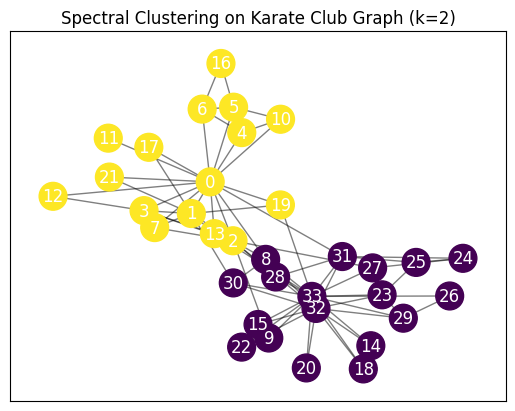

In [9]:
runSpectralClustering(n_clusters=2)

Spectral Clustering Partition (Node: Cluster ID):
{0: np.int32(2), 1: np.int32(2), 2: np.int32(2), 3: np.int32(2), 4: np.int32(1), 5: np.int32(1), 6: np.int32(1), 7: np.int32(2), 8: np.int32(0), 9: np.int32(0), 10: np.int32(1), 11: np.int32(2), 12: np.int32(2), 13: np.int32(2), 14: np.int32(0), 15: np.int32(0), 16: np.int32(1), 17: np.int32(2), 18: np.int32(0), 19: np.int32(2), 20: np.int32(0), 21: np.int32(2), 22: np.int32(0), 23: np.int32(0), 24: np.int32(0), 25: np.int32(0), 26: np.int32(0), 27: np.int32(0), 28: np.int32(0), 29: np.int32(0), 30: np.int32(0), 31: np.int32(0), 32: np.int32(0), 33: np.int32(0)}
defaultdict(<class 'list'>, {2: [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21], 1: [4, 5, 6, 10, 16], 0: [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]})


/tmp/ipython-input-8-1376067333.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', max(spectral_labels) + 1)


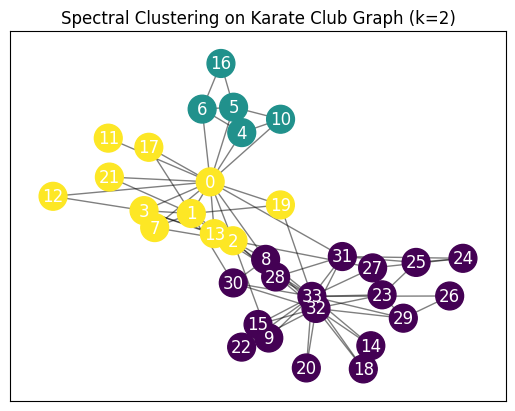

In [10]:
runSpectralClustering(n_clusters=3)

Spectral Clustering Partition (Node: Cluster ID):
{0: np.int32(1), 1: np.int32(1), 2: np.int32(1), 3: np.int32(1), 4: np.int32(2), 5: np.int32(2), 6: np.int32(2), 7: np.int32(1), 8: np.int32(0), 9: np.int32(0), 10: np.int32(2), 11: np.int32(1), 12: np.int32(1), 13: np.int32(1), 14: np.int32(0), 15: np.int32(0), 16: np.int32(2), 17: np.int32(1), 18: np.int32(0), 19: np.int32(1), 20: np.int32(0), 21: np.int32(1), 22: np.int32(0), 23: np.int32(3), 24: np.int32(3), 25: np.int32(3), 26: np.int32(0), 27: np.int32(3), 28: np.int32(3), 29: np.int32(0), 30: np.int32(0), 31: np.int32(3), 32: np.int32(0), 33: np.int32(0)}
defaultdict(<class 'list'>, {1: [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21], 2: [4, 5, 6, 10, 16], 0: [8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33], 3: [23, 24, 25, 27, 28, 31]})


/tmp/ipython-input-8-1376067333.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', max(spectral_labels) + 1)


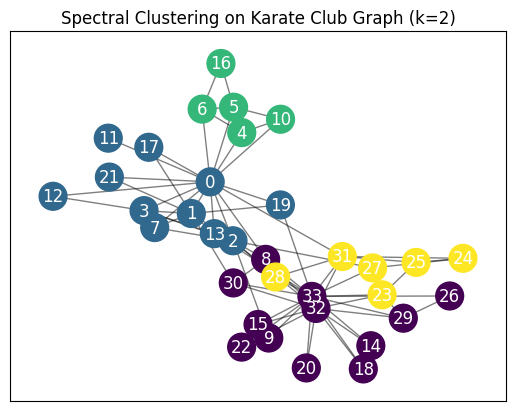

In [11]:
runSpectralClustering(n_clusters=4)

Spectral Clustering Partition (Node: Cluster ID):
{0: np.int32(1), 1: np.int32(1), 2: np.int32(1), 3: np.int32(1), 4: np.int32(2), 5: np.int32(2), 6: np.int32(2), 7: np.int32(1), 8: np.int32(0), 9: np.int32(0), 10: np.int32(2), 11: np.int32(1), 12: np.int32(1), 13: np.int32(1), 14: np.int32(0), 15: np.int32(0), 16: np.int32(2), 17: np.int32(1), 18: np.int32(0), 19: np.int32(1), 20: np.int32(0), 21: np.int32(1), 22: np.int32(0), 23: np.int32(4), 24: np.int32(4), 25: np.int32(4), 26: np.int32(3), 27: np.int32(4), 28: np.int32(0), 29: np.int32(3), 30: np.int32(0), 31: np.int32(4), 32: np.int32(0), 33: np.int32(0)}
defaultdict(<class 'list'>, {1: [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21], 2: [4, 5, 6, 10, 16], 0: [8, 9, 14, 15, 18, 20, 22, 28, 30, 32, 33], 4: [23, 24, 25, 27, 31], 3: [26, 29]})


/tmp/ipython-input-8-1376067333.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', max(spectral_labels) + 1)


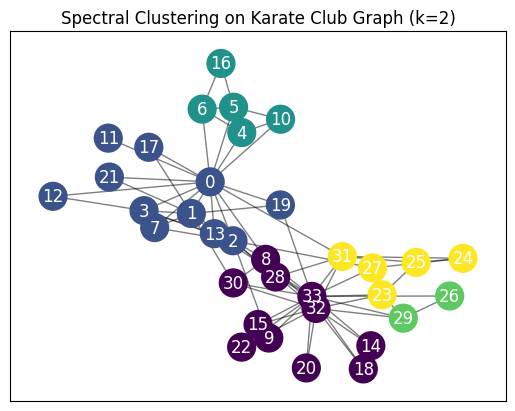

In [12]:
runSpectralClustering(n_clusters=5)

### Q3. Compare the __Spectral Clustering__ to __Louvain__. Do they align?

- **Spectral Clustering (with k=n_clusters):** It produces a "clean" split of the graph into exactly `n_clusters` communities. It finds the globally optimal way to make one cut across the entire graph to create two pieces. This split almost perfectly aligns with the real-life factions.
- **Louvain Method:** When we run Louvain on the Karate Club, it often finds four communities, not two! This is because it is greedily maximizing modularity. It finds that splitting the two main factions into even smaller, ultra-dense sub-groups (e.g., the most loyal followers of each leader) results in a higher overall modularity score.

They do not align in terms of exact count of clusters.

### Q4. Why is graph-based clustering superior to traditional K-Means clustering for network data?
Graph-based clustering is superior for network data because it works on the data's native structure (relationships and connectivity), whereas K-Means is designed for a completely different type of data structure (geometric points in a feature space).